## Module Trait Relationship (MTR) using PyWGCNA

After identifying co-expressed modules, we can calculate the module eigengenes with traits to get insights about identity of each modules.

In this notebook, I want to give some showcases of how you can conect them.

First of all, I would suggest to have categorical data in your metadata to be able to interpret the heatmap better. For example, if you only have two categories, based on the order specified in your data, the first one is mapped to zero and the other one mapped to one so if the order were not specified, you need to look at other plots such as module_barplot to be able to interpret the positive and negative correlation. 

If you have more than two variables, PyWGCNA will consider each of the item as a single bool trait.
some times you have a variable such as age and you want to investigate the progression of time in your modules. In this case, the column represting this should contains numeric values.

Most of the time your modules have a correlation between multiple traits and if you calculate the correlation for each trait seperately you couldn't capture these correlation. To achive these I would suggest adding another column in your `self.datExpr.obs` and specify the data type that suits your data.

In [1]:
#import sys
#sys.path.insert(0, '/Users/nargesrezaie/Documents/MortazaviLab/PyWGCNA')
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")
pyWGCNA_5xFAD.save = False

Reading 5xFAD WGCNA done!


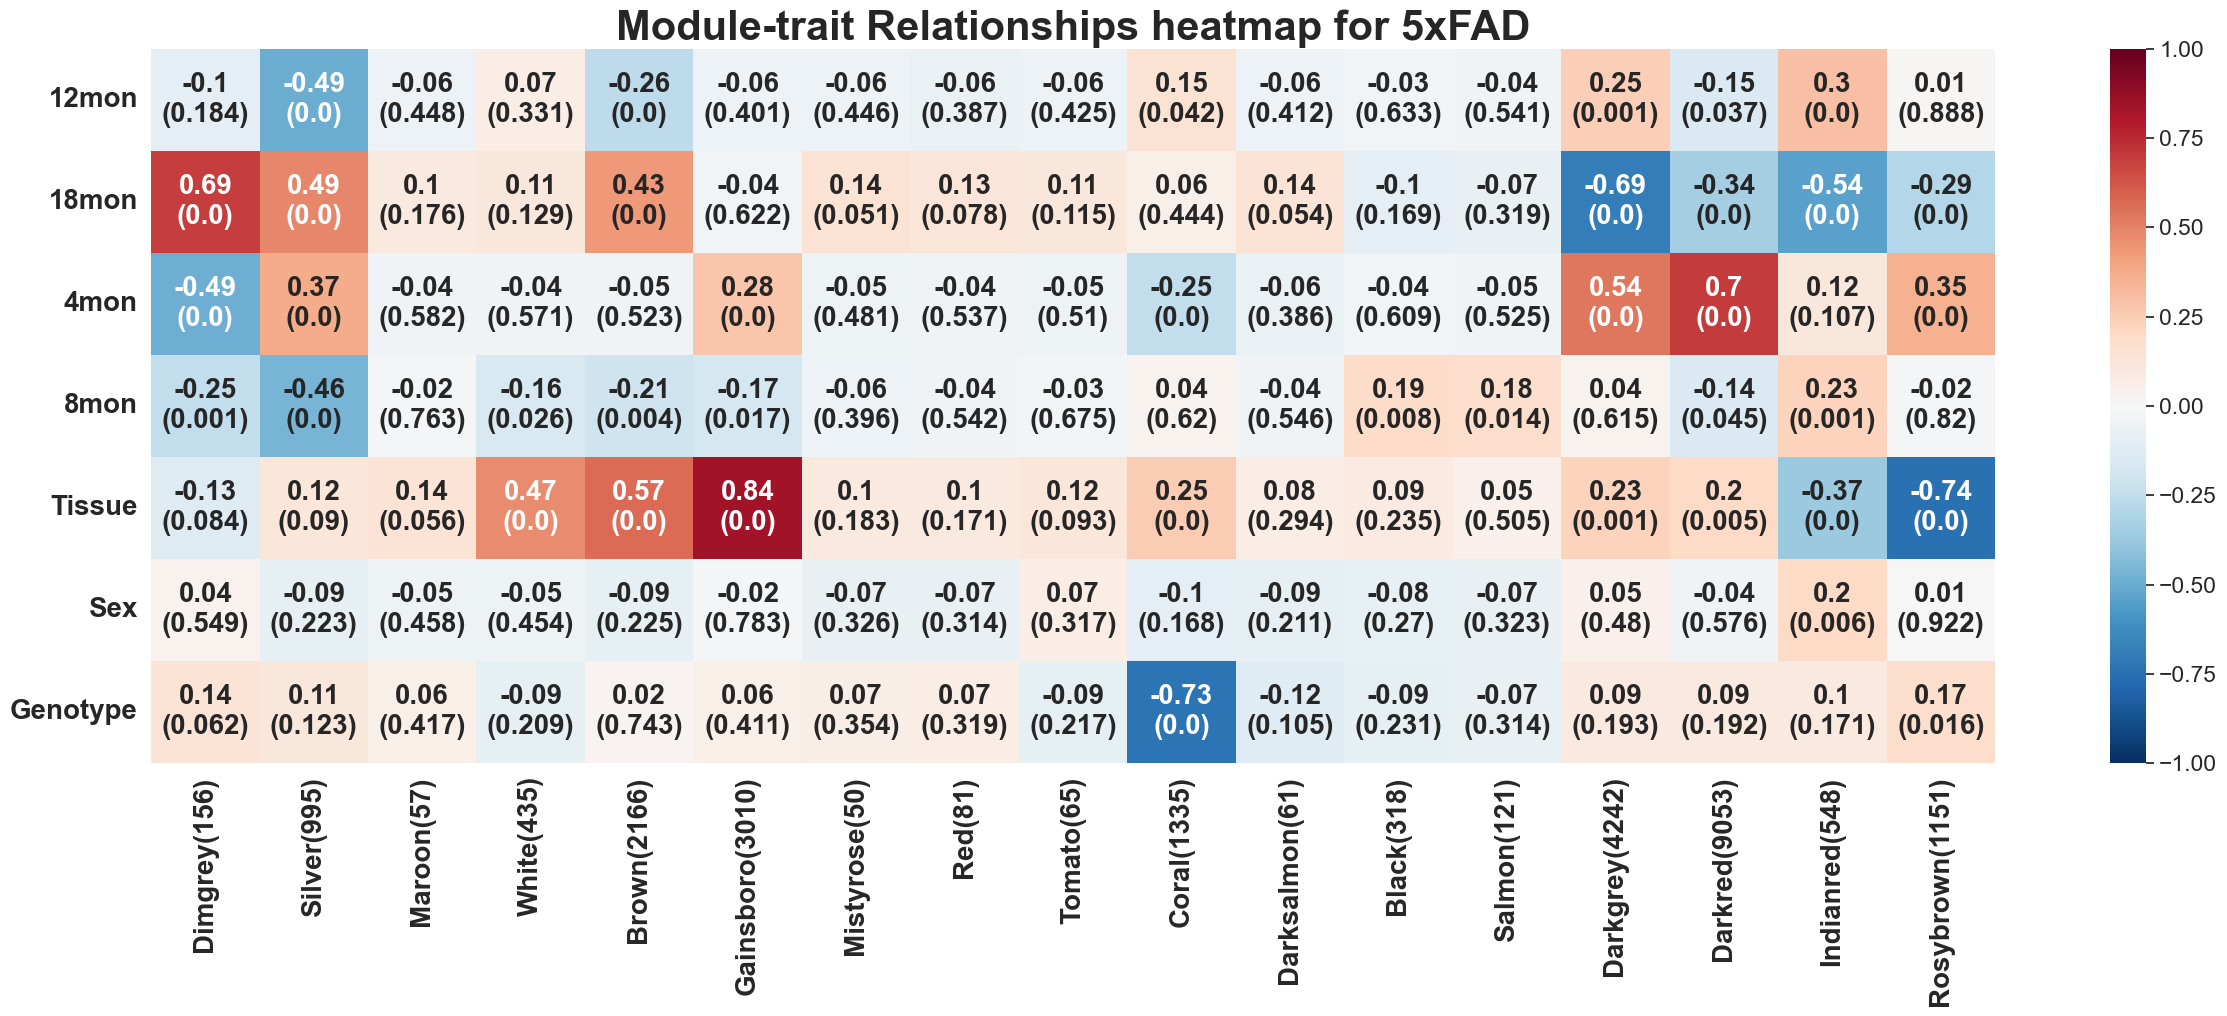

In [7]:
pyWGCNA_5xFAD.module_trait_relationships_heatmap(metaData=['Age', 'Tissue', 'Sex', 'Genotype'],
                                                 alternative='two-sided')

if we want to look at the age as on row in our module trait relationships heatmap, we should change the dtype of age.

Here you can see the modules with higher correlation with later time points have positive correlation while those correlated with earlier time points has negative correlation.

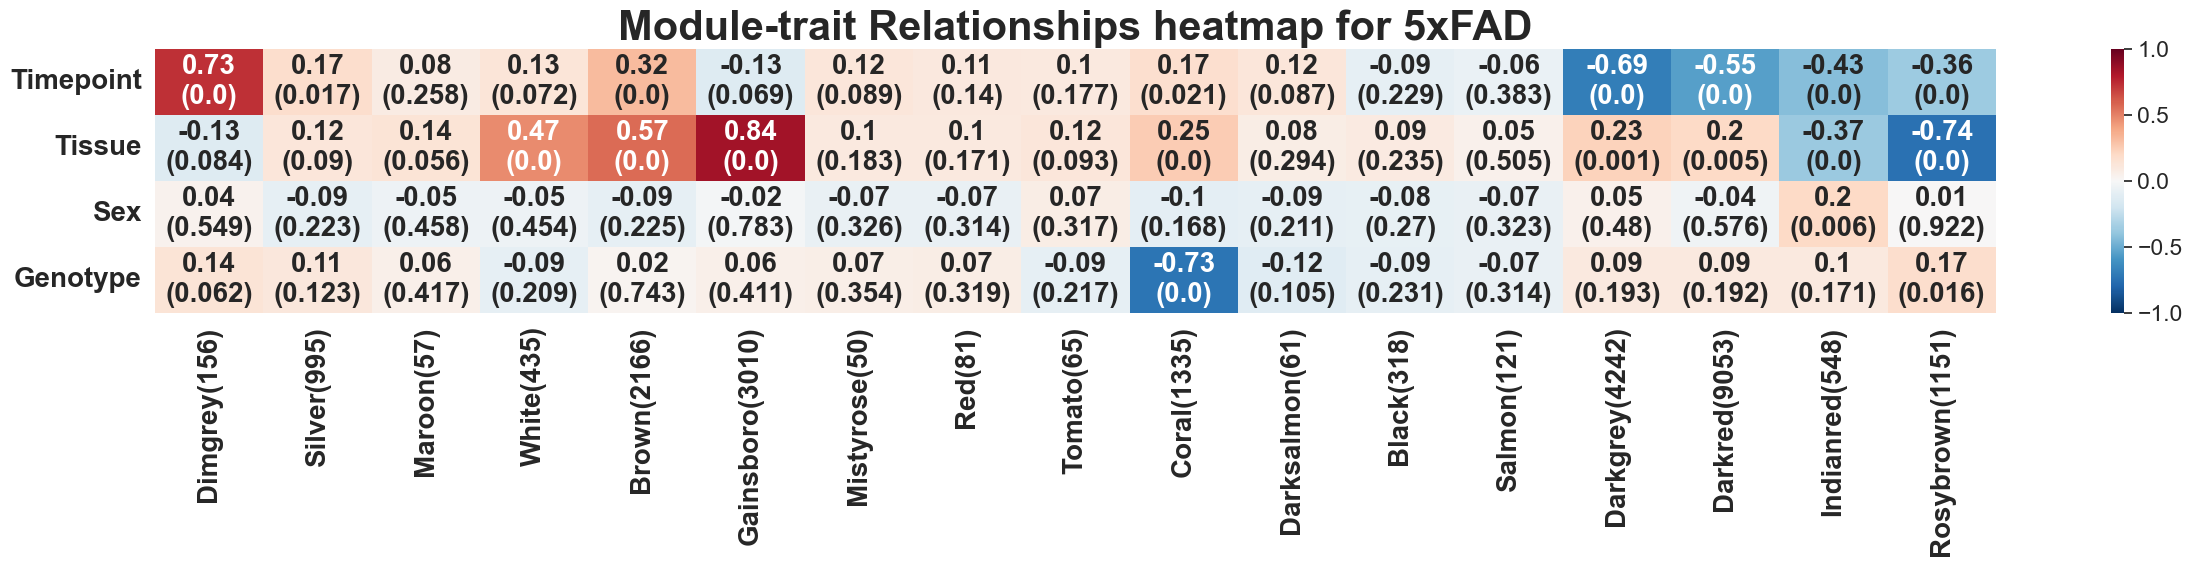

In [3]:
pyWGCNA_5xFAD.datExpr.obs['Timepoint'] = pyWGCNA_5xFAD.datExpr.obs.Age
pyWGCNA_5xFAD.datExpr.obs['Timepoint'].replace({'4mon': '4',
                                                '8mon': '8',
                                                '12mon': '12',
                                                '18mon': '18'}, inplace=True)
pyWGCNA_5xFAD.datExpr.obs['Timepoint'] = pyWGCNA_5xFAD.datExpr.obs['Timepoint'].astype('int')
pyWGCNA_5xFAD.module_trait_relationships_heatmap(metaData=['Timepoint', 'Tissue', 'Sex', 'Genotype'],
                                                 alternative='two-sided')

if you want to investigate the effect of age and sex at the same time you should add another column contains both information. 

In plot below, even though the silver modules apear to have positive correlation with 4 month samples but it apears that it mostly correlated with female 4 month rather than male.

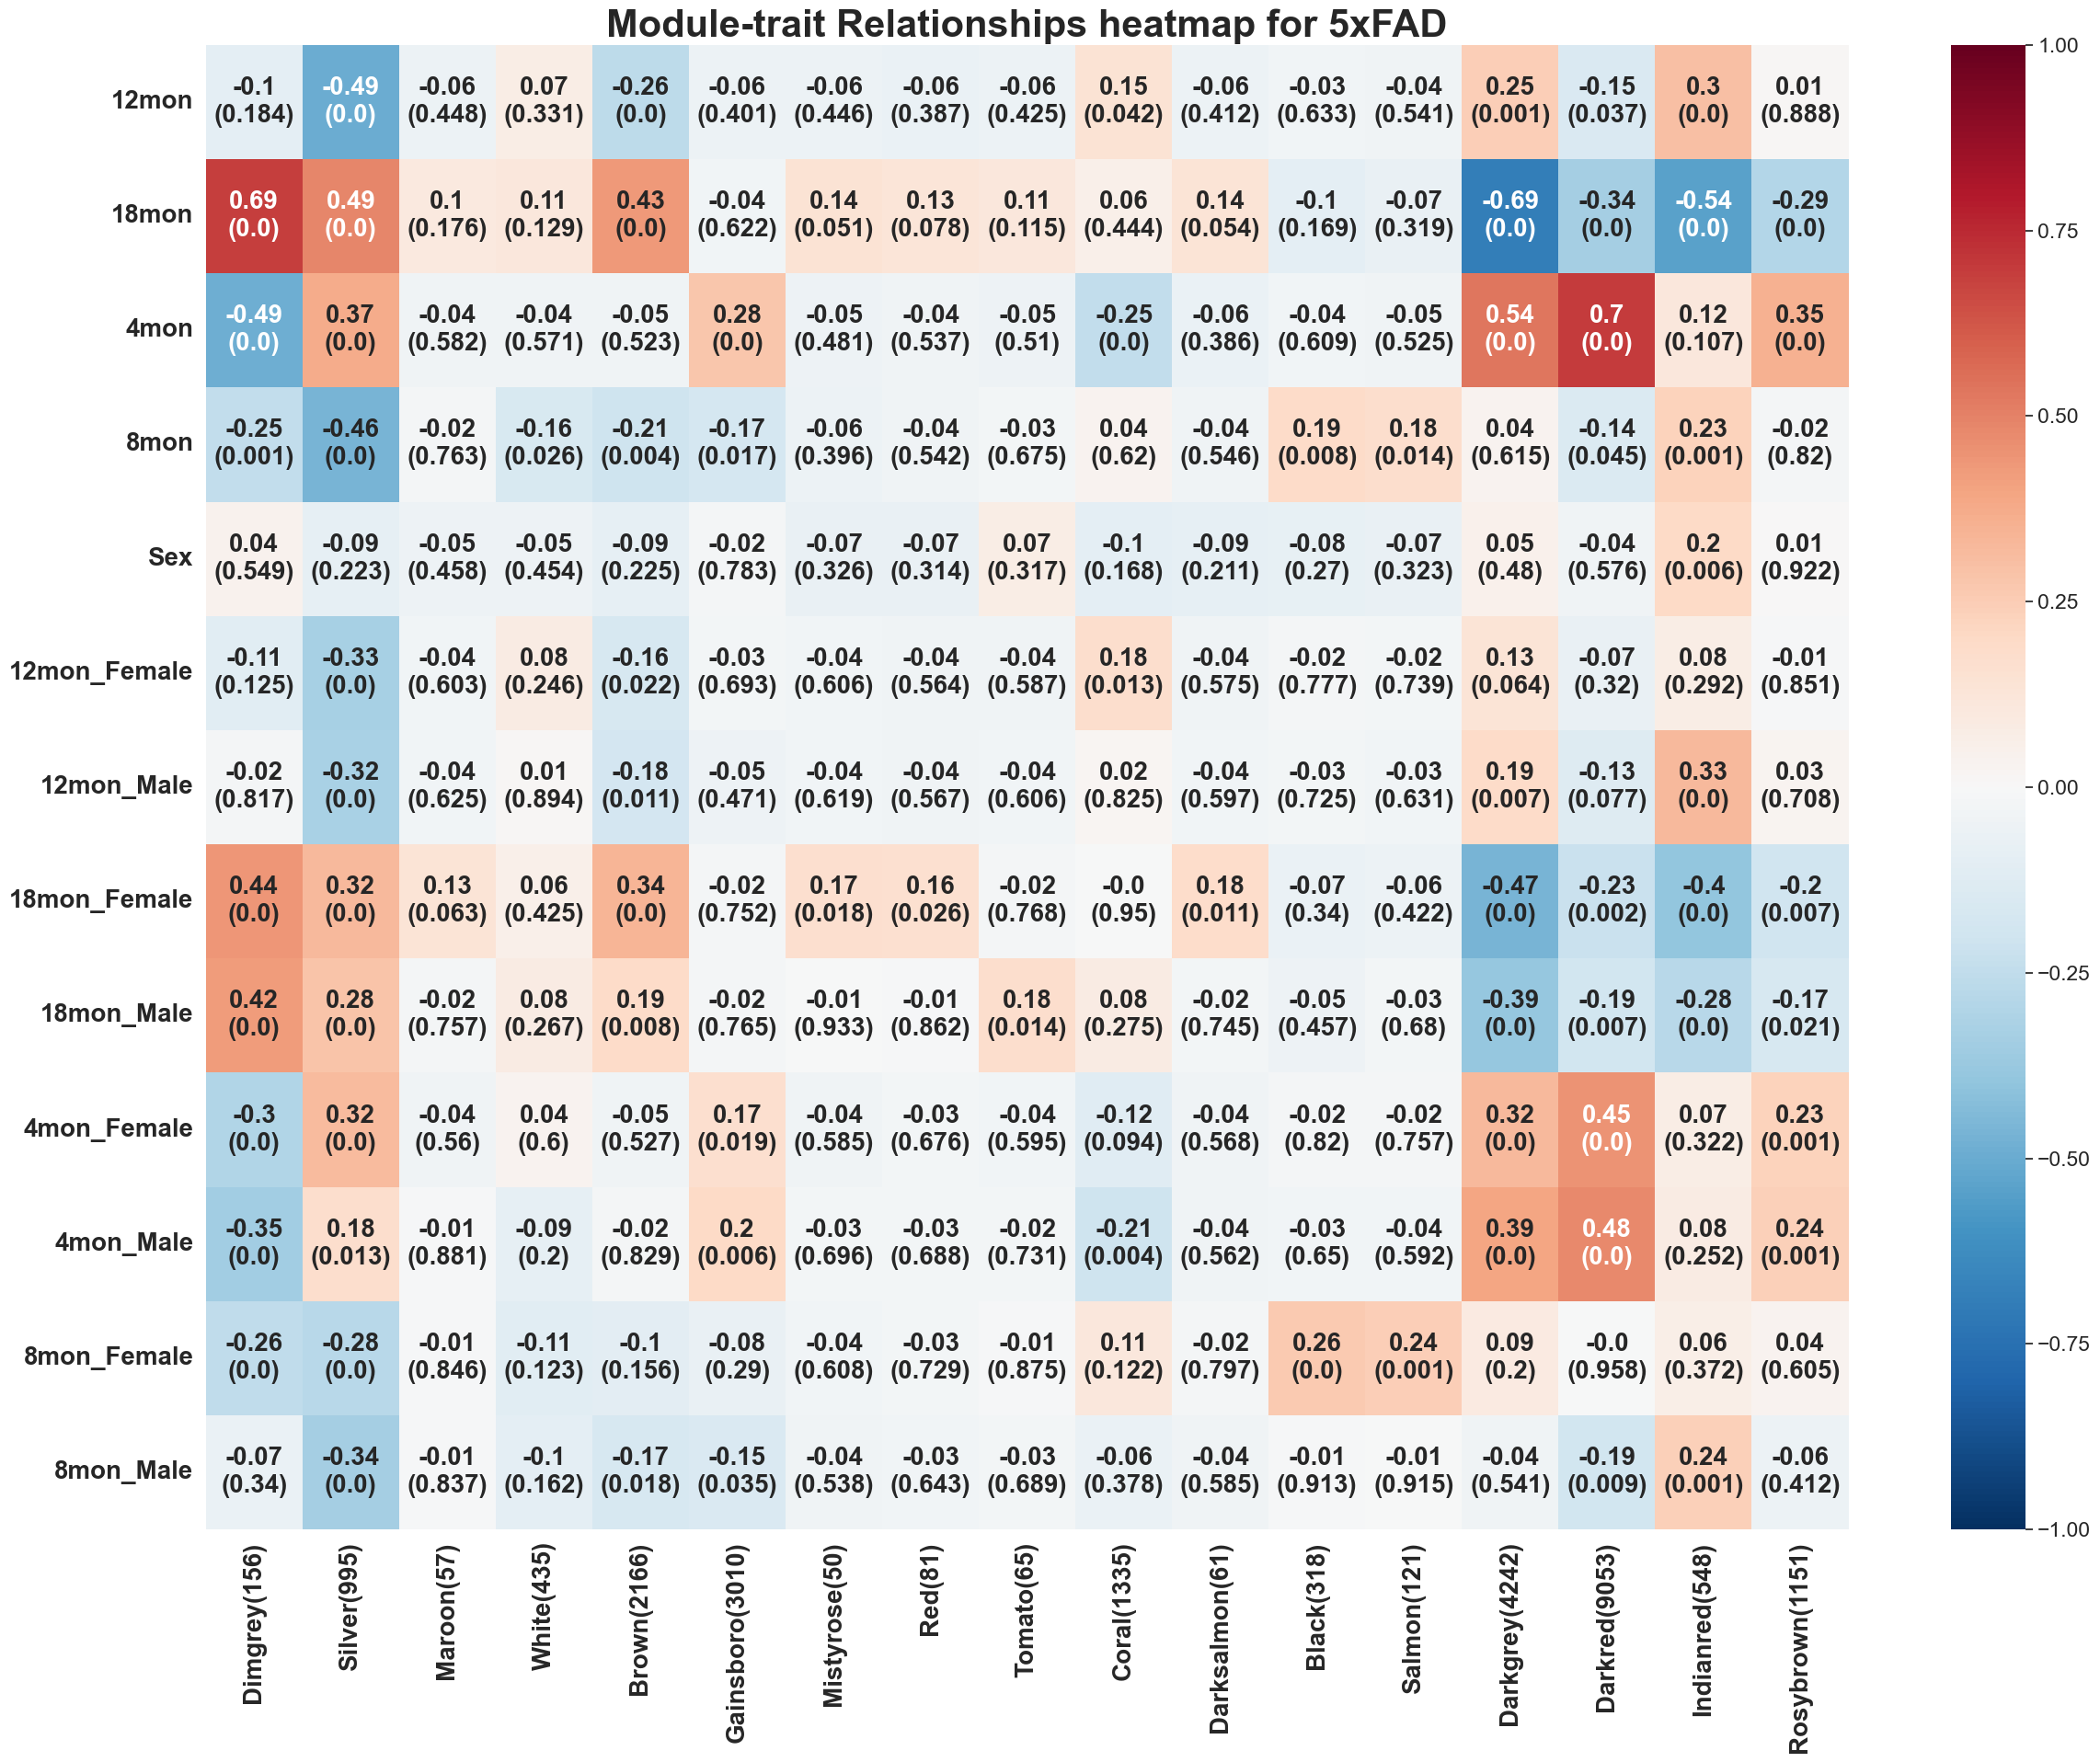

In [6]:
pyWGCNA_5xFAD.datExpr.obs['Age_Sex'] = pyWGCNA_5xFAD.datExpr.obs['Age'] + "_"+ pyWGCNA_5xFAD.datExpr.obs['Sex']
pyWGCNA_5xFAD.module_trait_relationships_heatmap(metaData=['Age', 'Sex', 'Age_Sex'],
                                                 alternative='two-sided')